In [105]:
import matplotlib.pyplot as plt
import math

def process():
    dict = {}
    f = open("result.txt")
    lines = f.readlines()
    for line in lines:
        c = line.split(",") 
        #c[0]: method, c[1]: theta, c[2]: input size(bs num) 
        #c[3]: en num, c[4]: cost, c[5]: time
        
        method = c[0]
        theta = c[1]
        bs_num = c[2]
        
        c[5] = c[5].replace("\n","")
        if theta in dict:
            if method in dict[theta]:
                if bs_num in dict[theta][method]:
                    dict[theta][method][bs_num].append([c[3], c[4], c[5]])
                else:
                    dict[theta][method].update({bs_num: [[c[3], c[4], c[5]]]})
            else:
                dict[theta].update({method: {}})
        else:
            dict.update({theta: {}})
            
    f.close()
    return dict
dict = process()
#print(dict) 

In [106]:
def getStatistic(dict):
    for t in dict:
        for m in dict[t]:
            for bs in dict[t][m]:
                en = 0
                cost = 0
                time = 0
                for value in dict[t][m][bs]:
                    #print(value)
                    en = en + int(value[0])
                    cost = cost + int(float(value[1]))
                    time = time + float(value[2])
                en = math.ceil(en / len(dict[t][m][bs]))
                cost = math.ceil(cost / len(dict[t][m][bs]))
                time = float("{:.2f}".format(time / len(dict[t][m][bs])))
                
                dict[t][m][bs] = [en, cost, time]

getStatistic(dict)
#print(dict)

{'greedy': [19.1, 24.2, 32.6, 36.4, 47.8, 48.2, 175.4, 80.1, 123.8, 224.5, 237.7, 197.1], 'greedy_new': [20.3, 20.9, 26.9, 35.1, 41.04, 40.72, 42.54, 55.78, 79.56, 108.62, 120.74, 150.68], 'random': [56.875, 90.26, 48.2, 59.04, 85.96, 85.18, 147.62, 279.78, 282.44, 255.2, 406.34, 455.28], 'mip': [13.246, 15.568, 19.402, 23.499, 26.484]}


<Figure size 900x600 with 0 Axes>

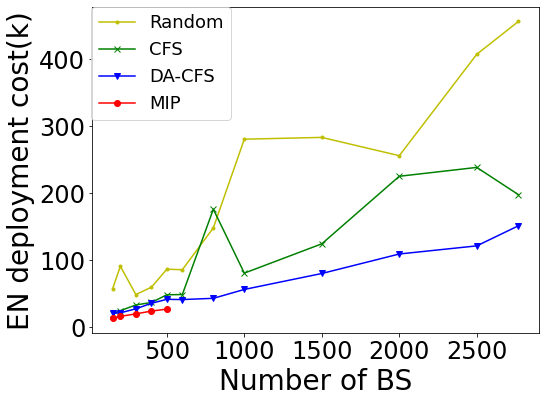

In [124]:
# dict[theta][method][bs_num] ->[en, cost, time]
plt.figure(dpi=150)
font = 28

def plotCost():
    theta = "14.0"
    #x = ["150", "200", "300", "400","500","600", "800", "1000", "1500", "2000", "2500", "2769"]
    x = ["150", "200", "300", "400","500", "600", "800","1000", "1500", "2000", "2500", "2769"]
    #x = ["150", "200", "250", "300", "350","400","450","500"]
    plot_dict = {}
#     random = []
#     greedy = []
#     greedy_new = []
    
    for method in dict[theta]:
        for i in x:
            if method in plot_dict:
                if i in dict[theta][method]:
                    value = dict[theta][method][i][1]
                    plot_dict[method].append(value/1000)
            else:
                if method in dict[theta]:
                    value = dict[theta][method][i][1]
                    plot_dict.update({method:[value / 1000]})
            
    print(plot_dict)
    
    #fig,ax = plt.subplots()
    fig = plt.figure(figsize=(8, 6))
    
    plt.xlabel(r'Number of BS', fontsize=font)
    plt.ylabel(r'EN deployment cost(k)', fontsize=font)
    
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)

    n = [int(i) for i in x]
    #markersize=15, linewidth = 3,
    plt.plot(n, plot_dict['random'], "y.-",  label="Random")
    plt.plot(n, plot_dict['greedy'], "gx-",  label="CFS")
    plt.plot(n, plot_dict['greedy_new'], "bv-",label="DA-CFS")
    plt.plot(n[0:len(plot_dict['mip'])], plot_dict['mip'], "ro-",label="MIP")
    
    
    plt.legend(bbox_to_anchor=(0.31, 1), loc=1, borderaxespad=0., fontsize = 18)

    #plt.grid(True)
    plt.savefig('./img/cost.pdf', bbox_inches = 'tight')
    
plotCost()

{'greedy': [0.06, 0.09, 0.14, 0.19, 0.26, 0.31, 0.7, 1.17, 2.6, 4.64, 7.38, 9.11], 'greedy_new': [0.08, 0.09, 0.13, 0.19, 0.23, 0.34, 0.86, 1.14, 2.56, 4.7, 7.67, 9.05], 'random': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.01, 0.01, 0.02, 0.02, 0.02], 'mip': [16.42, 30.62, 49.98, 104.2, 141.08, 196.89, 0, 0, 0, 0, 0, 0]}


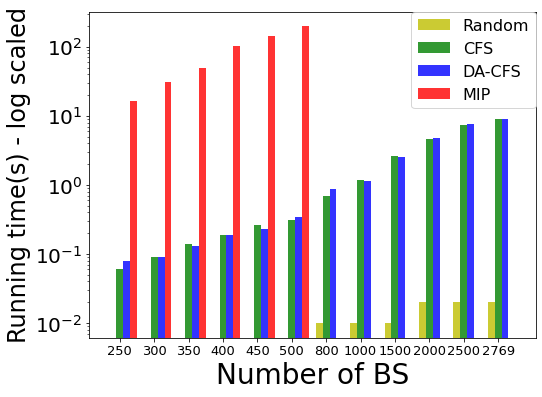

In [135]:
# patterns = ('-', '+', 'x', '\\', '*', 'o', 'O', '.')
# for bar, pattern in zip(bars, patterns):
#     bar.set_hatch(pattern)

def plotTimeBar():
    theta = "14.0"
    x = ["200", "500", "1000", "1500", "2000", "2500", "2769"]
    x = ["250", "300", "350","400","450","500","800", "1000", "1500", "2000", "2500", "2769"]
    plot_dict = {}
    
    for method in dict[theta]:
        for i in x:
            if method in plot_dict:
                if i in dict[theta][method]:
                    plot_dict[method].append(dict[theta][method][i][2])
                else:
                    plot_dict[method].append(0)
            else:
                plot_dict.update({method:[dict[theta][method][i][2]]})
            
    print(plot_dict)
    
    
    #fig,ax = plt.subplots()
    fig = plt.figure(figsize=(8, 6))
    plt.yscale("log")
    
    plt.xlabel(r'Number of BS', fontsize=font)
    plt.ylabel(r'Running time(s) - log scaled', fontsize=24)

    r = range(1, len(plot_dict['random'])+1)
    p_random = [i - 0.2 for i in r]
    p_greedy = [i for i in r]
    p_greedy_new = [i + 0.2 for i in r]
    p_mip = [i + 0.4 for i in r]
    #print(p_random)
    
    bar1 = plt.bar(p_random, height = plot_dict['random'], width = 0.2, alpha = 0.8, color = 'y',label = 'Random')                 
    bar2 = plt.bar(p_greedy,plot_dict['greedy'],width = 0.2, alpha = 0.8,color = 'g',label = 'CFS') 
    bar3 = plt.bar(p_greedy_new,plot_dict['greedy_new'],width = 0.2, alpha = 0.8,color = 'b',label = 'DA-CFS') 
    bar4 = plt.bar(p_mip,plot_dict['mip'],width = 0.2, alpha = 0.8,color = 'r',label = 'MIP') 
    
    #n = [int(i)/100 for i in x]
    
    plt.yticks(fontsize=20)
    plt.xticks(r,x, fontsize=13) 
    plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0., fontsize=16)

    plt.savefig('./img/time.pdf', bbox_inches = 'tight')
    #plt.grid(True)
    
# def plotTimeLine():
#     theta = "10.0"
#     x = ["150", "200", "300", "400","500","600", "800", "1000", "1500", "2000", "2500", "2769"]
#     plot_dict = {}
    
#     for method in dict[theta]:
#         for i in x:
#             if method in plot_dict:
#                 if i in dict[theta][method]:
#                     value = dict[theta][method][i][2]
#                     plot_dict[method].append(value)
#             else:
#                 if method in dict[theta]:
#                     value = dict[theta][method][i][2]
#                     plot_dict.update({method:[value]})
            
#     print(plot_dict)
    
#     #fig,ax = plt.subplots()
#     fig = plt.figure(figsize=(8, 6))
#     plt.yscale("log")
    
#     plt.xlabel(r'Number of BS', fontsize=12)
#     plt.ylabel(r'Algorithm running time(s) in log when $\theta$ = ' + theta, fontsize=font)

#     n = [int(i) for i in x]
    
#     plt.plot(n, plot_dict['random'], "r.-", label="Random")
#     plt.plot(n, plot_dict['greedy'], "gx-", label="CFS")
#     plt.plot(n, plot_dict['greedy_new'], "bv-", label="DA-CFS")
#     plt.plot(n[0:len(plot_dict['mip'])], plot_dict['mip'], "yo-", label="MIP")
    
    
#     plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0., fontsize = font)

#     #plt.grid(True)
#     fig.savefig('./img/time.pdf', bbox_inches = 'tight')
    
    
plotTimeBar()

{'greedy': [32, 35, 42, 51, 55, 63, 70, 78, 91, 101, 118, 119], 'greedy_new': [31, 34, 41, 50, 53, 60, 67, 76, 93, 98, 118, 117], 'random': [36, 43, 52, 62, 70, 73, 81, 91, 110, 117, 133, 141], 'mip': [26, 33, 36, 46, 50, 0, 0, 0, 0, 0, 0, 0]}


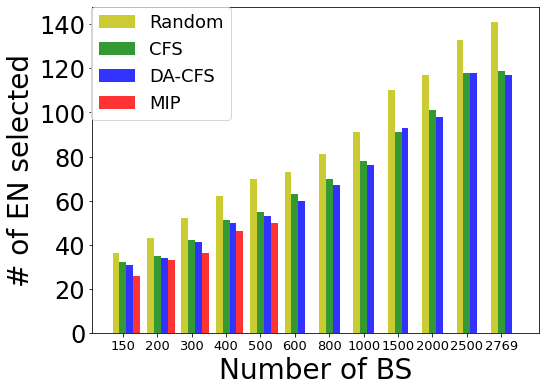

In [127]:
# def plotENLine():
#     theta = "14.0"
#     #x = ["150", "200", "300", "400","500","600", "800", "1000", "1500", "2000", "2500", "2769"]
#     x = ["250", "300", "350","400","450","500","800", "1000", "1500", "2000", "2500", "2769"]
#     plot_dict = {}
    
#     for method in dict[theta]:
#         for i in x:
#             if method in plot_dict:
#                 if i in dict[theta][method]:
#                     plot_dict[method].append(dict[theta][method][i][0])
#             else:
#                 if method in dict[theta]:
#                     plot_dict.update({method:[dict[theta][method][i][0]]})
            
#     print(plot_dict)
    
#     #fig,ax = plt.subplots()
#     fig = plt.figure(figsize=(8, 6))
#     plt.yscale("log")
    
#     plt.xlabel(r'Number of BS')
#     plt.ylabel(r'EN # when $\theta$ = 10')

#     n = [int(i) for i in x]
    
#     plt.plot(n, plot_dict['random'], "y.-", label="Random")
#     plt.plot(n, plot_dict['greedy'], "gx-", label="CFS")
#     plt.plot(n, plot_dict['greedy_new'], "bv-", label="DA-CFS")
#     plt.plot(n[0:len(plot_dict['mip'])], plot_dict['mip'], "ro-", label="MIP")
    
    
#     plt.legend(bbox_to_anchor=(0.18, 1), loc=1, borderaxespad=0., fontsize=font)

#     #plt.grid(True)
#     fig.savefig('./img/time.pdf', bbox_inches = 'tight')

def plotENBar():
    theta = "14.0"
    x = ["150", "200", "300", "400","500","600", "800", "1000", "1500", "2000", "2500", "2769"]
    #x = ["200", "500", "1000", "1500", "2000", "2500", "2768"]
    plot_dict = {}
    
    for method in dict[theta]:
        for i in x:
            if method in plot_dict:
                if i in dict[theta][method]:
                    plot_dict[method].append(dict[theta][method][i][0])
                else:
                    plot_dict[method].append(0)
            else:
                plot_dict.update({method:[dict[theta][method][i][0]]})
            
    print(plot_dict)
    
    
    #fig,ax = plt.subplots()
    fig = plt.figure(figsize=(8, 6))
    
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=24)
    
    plt.xlabel(r'Number of BS', fontsize=font)
    plt.ylabel(r'# of EN selected', fontsize=font)

    r = range(1, len(plot_dict['random'])+1)
    p_random = [i - 0.2 for i in r]
    p_greedy = [i for i in r]
    p_greedy_new = [i + 0.2 for i in r]
    p_mip = [i + 0.4 for i in r]
    #print(p_random)
    
    bar1 = plt.bar(p_random, height = plot_dict['random'], width = 0.2, alpha = 0.8, color = 'y',label = 'Random')                 
    bar2 = plt.bar(p_greedy,plot_dict['greedy'],width = 0.2, alpha = 0.8,color = 'g',label = 'CFS') 
    bar3 = plt.bar(p_greedy_new,plot_dict['greedy_new'],width = 0.2, alpha = 0.8,color = 'b',label = 'DA-CFS') 
    bar4 = plt.bar(p_mip,plot_dict['mip'],width = 0.2, alpha = 0.8,color = 'r',label = 'MIP')
    
    plt.xticks(r,x) 
    plt.legend(bbox_to_anchor=(0.31, 1), loc=1, borderaxespad=0., fontsize=18)

    #plt.grid(True)
    plt.savefig('./img/en.pdf', bbox_inches = 'tight')
    
plotENBar()


{'greedy': [100, 79, 66, 55, 46, 44], 'greedy_new': [98, 78, 66, 53, 45, 44], 'random': [121, 97, 81, 70, 59, 51], 'mip': [89, 75, 57, 50, 36, 35]}


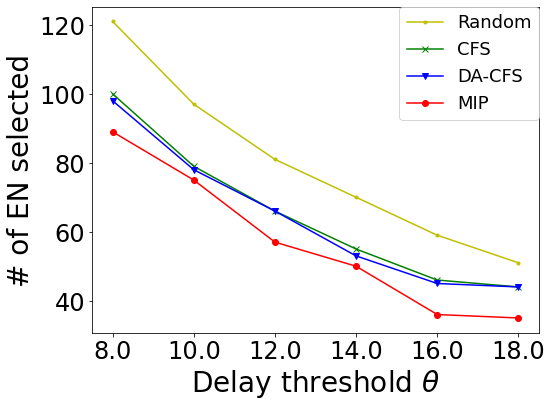

In [129]:
# dict[theta][method][bs_num] ->[en, cost, time]
def plotThetaWithEN():
    x = []
    plot_dict = {}
    bs = "500"
    
    for theta in dict:
        x.append(theta)
        for method in dict[theta]:
            if method in plot_dict:
                if bs in dict[theta][method]:
                    plot_dict[method].append(dict[theta][method][bs][0])
            else:
                if bs in dict[theta][method]:
                    plot_dict.update({method:[dict[theta][method][bs][0]]})
            
    print(plot_dict)
    
    
    #fig,ax = plt.subplots()
    fig = plt.figure(figsize=(8, 6))
    
    plt.xlabel(r'Delay threshold $\theta$', fontsize=font)
    plt.ylabel(r'# of EN selected', fontsize=font)
    
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    
    plt.plot(x, plot_dict['random'], "y.-", label="Random")
    plt.plot(x, plot_dict['greedy'], "gx-", label="CFS")
    plt.plot(x, plot_dict['greedy_new'], "bv-", label="DA-CFS")
    plt.plot(x, plot_dict['mip'], "ro-", label="MIP")
    
    
    plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0., fontsize=18)
    
    plt.savefig('./img/theta_en.pdf', bbox_inches = 'tight')
    
plotThetaWithEN()


{'greedy': [113.5, 68.4, 51.6, 47.8, 35.6, 45.5], 'greedy_new': [103.38, 66.98, 47.1, 41.04, 28.8, 35.52], 'random': [182.6, 121.46, 101.84, 85.96, 102.1, 79.7], 'mip': [48.721, 38.86, 31.317, 26.484, 23.028, 19.703]}


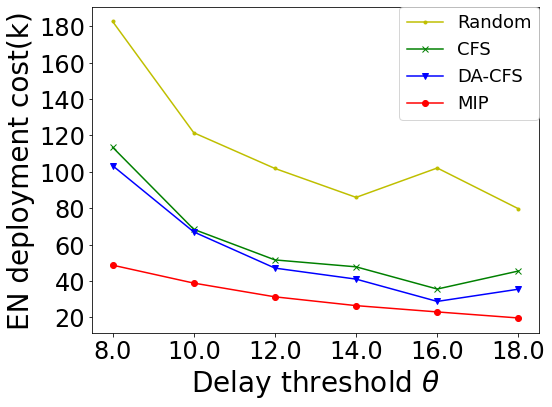

In [130]:
def plotThetaWithCost():
    x = []
    plot_dict = {}
    bs = "500"
    
    for theta in dict:
        x.append(theta)
        for method in dict[theta]:
            if method in plot_dict:
                if bs in dict[theta][method]:
                    value = dict[theta][method][bs][1]
                    plot_dict[method].append(value/1000)
            else:
                if bs in dict[theta][method]:
                    value = dict[theta][method][bs][1]
                    plot_dict.update({method:[value/1000]})
            
    print(plot_dict)
    
    
    #fig,ax = plt.subplots()
    fig = plt.figure(figsize=(8, 6))
    
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    
    plt.xlabel(r'Delay threshold $\theta$', fontsize=font)
    plt.ylabel(r'EN deployment cost(k)', fontsize=font)
    
    #i - 0.2 for i in r
    plt.plot(x, plot_dict['random'], "y.-", label="Random")
    plt.plot(x, plot_dict['greedy'], "gx-", label="CFS")
    plt.plot(x, plot_dict['greedy_new'], "bv-", label="DA-CFS")
    plt.plot(x, plot_dict['mip'], "ro-", label="MIP")
    
    
    plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0., fontsize=18)
    plt.savefig('./img/theta_cost.pdf', bbox_inches = 'tight')
    
plotThetaWithCost()


{'greedy': [0.53, 0.43, 0.29, 0.31, 0.2, 0.2], 'greedy_new': [0.66, 0.43, 0.4, 0.34, 0.21, 0.18], 'random': [0.01, 0.01, 0.0, 0.0, 0.0, 0.0], 'mip': [51.97, 148.89, 187.17, 196.89, 426.74, 774.39]}


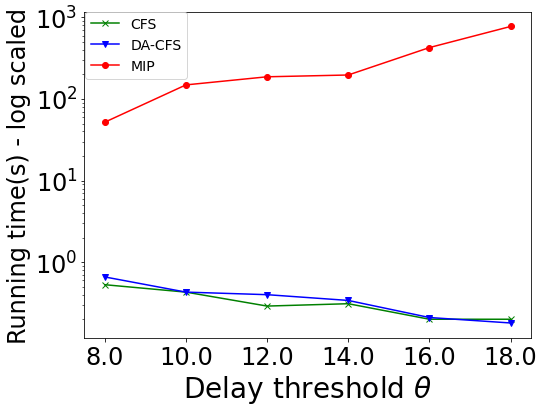

In [136]:
def plotThetaWithTimeLine():
    x = []
    plot_dict = {}
    bs = "500"
    
    for theta in dict:
        x.append(theta)
        for method in dict[theta]:
            if method in plot_dict:
                plot_dict[method].append(dict[theta][method][bs][2])
            else:
                plot_dict.update({method:[dict[theta][method][bs][2]]})
            
    print(plot_dict)
    
    
    #fig,ax = plt.subplots()
    fig = plt.figure(figsize=(8, 6))
    
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    
    plt.yscale("log")
    plt.xlabel(r'Delay threshold $\theta$', fontsize=font)
    plt.ylabel(r'Running time(s) - log scaled', fontsize=24)
    
    #plt.plot(x, plot_dict['random'], "y.-", label="Random")
    plt.plot(x, plot_dict['greedy'], "gx-", label="CFS")
    plt.plot(x, plot_dict['greedy_new'], "bv-", label="DA-CFS")
    plt.plot(x, plot_dict['mip'], "ro-", label="MIP")
    
    
    plt.legend(bbox_to_anchor=(0.23, 1), loc=1, borderaxespad=0., fontsize=14)
    plt.savefig('./img/theta_time.pdf', bbox_inches = 'tight')
    
plotThetaWithTimeLine()

['6', '8', '10', '12', '14', '16', '18', '20', '22', '24', '26', '28']
[164, 164, 163, 162, 162, 163, 162, 162, 162, 162, 162, 162]
[362.0, 343.4, 360.5, 358.4, 357.2, 354.1, 353.1, 346.8, 235.9, 232.7, 230.5, 227.3]


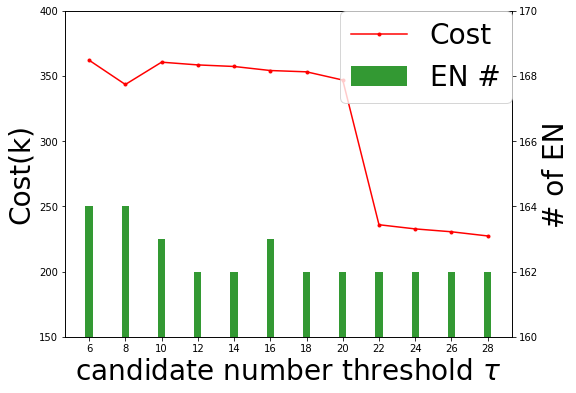

In [137]:
def plot_tau():
    x = []
    en = []
    cost = []
    
    f = open("result_tau.txt")
    lines = f.readlines()

    count = 1
    for line in lines:
        if(count % 2 == 0):
            c = line.split(",") 
            #c[0]: tau, c[1]: en, c[2]: cost
            x.append(c[0])
            en.append(int(c[1]))
            cost.append(int(c[2].replace("\n",""))/1000)          
        count = count + 1
    f.close()
    
    print(x)
    print(en)
    print(cost)
    
    fig = plt.figure(figsize=(8, 6))
    
    ax = fig.add_subplot(111)
    line_cost = ax.plot(x, cost, "r.-", label="Cost")
    ax.set_ylim(150, 400)
    
    ax2 = ax.twinx()
    #line_en = ax2.plot(x, en, "ro-", label="EN #")
    r = range(1, len(en)+1)
    p= [i - 1 for i in r]
    bar_en = ax2.bar(p, en,width = 0.2, alpha = 0.8,color = 'g',label = 'EN #')
    
    ax2.set_ylim(160, 170)
    
#     ax.set_xticks(fontsize=font)
#     ax.set_yticks(fontsize=font)
#     ax2.set_xticks(fontsize=font)

    ax.set_xlabel(r'candidate number threshold $\tau$', fontsize=font)
    ax.set_ylabel(r'Cost(k)', fontsize=font)
    ax2.set_ylabel(r'# of EN', fontsize=font)
    

    
    plt.legend(handles = [line_cost[0], bar_en], bbox_to_anchor=(1, 1), loc=1, borderaxespad=0., fontsize=font)
    
    #plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
    plt.savefig('./img/tau.pdf', bbox_inches = 'tight')
    
plot_tau()

In [138]:
import matplotlib.pyplot as plt
def process_distribution():
    dict = {}
    f = open("distribution.txt")
    lines = f.readlines()

    for line in lines[0:]:
        c = line.split(",") 
        #c[0]: name, c[1]: theta, c[2]: bs num, c[3]: trans delay, c[4]: comp delay
        method = c[0]
        theta = c[1]
        bs_num = c[2]
        trans = float(c[3])
        comp = float(c[4].replace("\n",""))
        
        if theta in dict:
            if method in dict[theta]:
                if bs_num in dict[theta][method]:
                    dict[theta][method][bs_num].append([trans, comp])
                else:
                    dict[theta][method].update({bs_num: [[trans, comp]]})
            else:
                dict[theta].update({method: {}})
        else:
            dict.update({theta: {}})
    f.close()
    #print(dict)
    return dict

    
dict = process_distribution()

[25, 56, 78, 88, 131, 167, 208, 209, 244, 239, 267, 263, 298, 353]
[62, 152, 162, 205, 206, 172, 206, 201, 205, 205, 183, 197, 256, 236]
[69, 190, 212, 251, 253, 211, 244, 213, 206, 188, 150, 156, 163, 147]


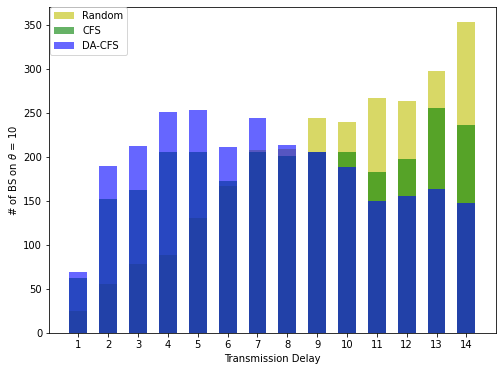

In [139]:
def plot_dist_bar():
    theta = "14.0"
    method = "greedy"
    bs_num = "2769"
    
    x = []
    y_random = []
    y_greedy = []
    y_greedy_new = []
    
    for i in range(int(float(theta))):
        x.append(i + 1)
        y_random.append(0)
        y_greedy.append(0)
        y_greedy_new.append(0)
         
#     for method in dict[theta]
    for item in dict[theta]["random"][bs_num][0:]:
        cate = int(item[0]%14)
        y_random[cate] = y_random[cate] + 1
        
    for item in dict[theta]["greedy"][bs_num][0:]:
        cate = int(item[0]%14)
        y_greedy[cate] = y_greedy[cate] + 1
        
    for item in dict[theta]["greedy_new"][bs_num][0:]:
        cate = int(item[0]%14)
        y_greedy_new[cate] = y_greedy_new[cate] + 1

    print(y_random)
    print(y_greedy)
    print(y_greedy_new)
    
    r = range(1, len(x)+1)
    p = [i for i in r]
    
 #fig,ax = plt.subplots()
    fig = plt.figure(figsize=(8, 6))
    
    plt.xlabel(r'Transmission Delay')
    plt.ylabel(r'# of BS on $\theta$ = 10')

    r = range(1, len(x)+1)
    p_random = [i - 0.2 for i in r]
    p_greedy = [i for i in r]
    p_greedy_new = [i + 0.2 for i in r]
    #p_mip = [i + 0.4 for i in r]
    #print(p_random)
    
#     bar1 = plt.bar(p_random, height = y_random, width = 0.2, alpha = 0.8, color = 'y',label = 'Random')                 
#     bar2 = plt.bar(p_greedy,y_greedy,width = 0.2, alpha = 0.8,color = 'g',label = 'CFS') 
#     bar3 = plt.bar(p_greedy_new,y_greedy_new,width = 0.2, alpha = 0.8,color = 'b',label = 'DA-CFS') 

    bar1 = plt.bar(p_greedy, height = y_random, width = 0.6, alpha = 0.6, color = 'y',label = 'Random')                 
    bar2 = plt.bar(p_greedy,y_greedy,width = 0.6, alpha = 0.6,color = 'g',label = 'CFS') 
    bar3 = plt.bar(p_greedy,y_greedy_new,width = 0.6, alpha = 0.6,color = 'b',label = 'DA-CFS') 
    #bar4 = plt.bar(p_mip,plot_dict['mip'],width = 0.2, alpha = 0.8,color = 'r',label = 'MIP')
    plt.xticks(r,x) 

    plt.legend(bbox_to_anchor=(0.175, 1), loc=1, borderaxespad=0.)
    plt.savefig('./img/distribution.pdf', bbox_inches = 'tight')

    #plt.grid(True)
    plt.show()

plot_dist_bar()

In [140]:
def plot_dist_line():
    theta = "14.0"
    method = "greedy"
    bs_num = "2769"
    
    x = []
    y_random = []
    y_greedy = []
    y_greedy_new = []
    
    for i in range(int(float(theta))):
        x.append(i + 1)
        y_random.append(0)
        y_greedy.append(0)
        y_greedy_new.append(0)
         
#     for method in dict[theta]
    for item in dict[theta]["random"][bs_num][0:]:
        cate = int(item[0]%14)
        y_random[cate] = y_random[cate] + 1
        
    for item in dict[theta]["greedy"][bs_num][0:]:
        cate = int(item[0]%14)
        y_greedy[cate] = y_greedy[cate] + 1
        
    for item in dict[theta]["greedy_new"][bs_num][0:]:
        cate = int(item[0]%14)
        y_greedy_new[cate] = y_greedy_new[cate] + 1

    print(y_random)
    print(y_greedy)
    print(y_greedy_new)
    
    r = range(1, len(x)+1)
    p = [i for i in r]

    #fig,ax = plt.subplots()
    fig = plt.figure(figsize=(8, 6))
    
    plt.xlabel(r'Transmission Delay')
    plt.ylabel(r'# of BS on $\theta$ = 10')
    
    #i - 0.2 for i in r
    plt.plot(x, y_random, "y.-", label="Random")
    plt.plot(x, y_greedy, "rx-", label="CFS")
    plt.plot(x, y_greedy_new, "bv-", label="DA-CFS")
    
    plt.legend(bbox_to_anchor=(0.175, 1), loc=1, borderaxespad=0.)

    plt.savefig('./img/distribution.pdf', bbox_inches = 'tight')

    #plt.grid(True)
    plt.show()
    
#plot_dist_line()

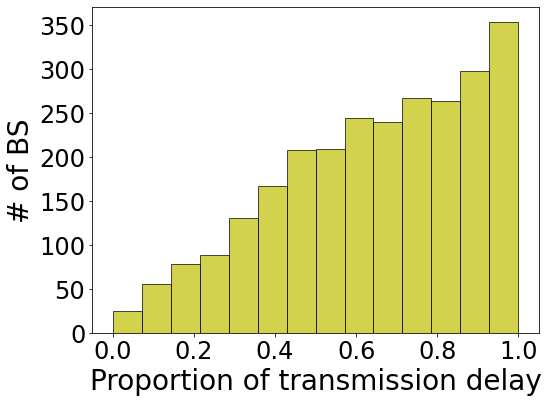

In [141]:
def plot_dist_his_random():
    theta = "14.0"
    method = "random"
    bs_num = "2769"
    
    data = [(int(i[0])%14)/14 for i in dict[theta]["random"][bs_num]]
    #print(data[0:50])
    
    fig = plt.figure(figsize=(8, 6))
    
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    
    plt.xlabel(r'Proportion of transmission delay', fontsize=font)
    plt.ylabel(r'# of BS', fontsize=font)
    
    plt.hist(data, bins = 14,align='mid',range=[0, 1],facecolor='y', edgecolor='black',alpha=0.7)
    plt.savefig('./img/dist_random.pdf', bbox_inches = 'tight')
    plt.show()
    
plot_dist_his_random()

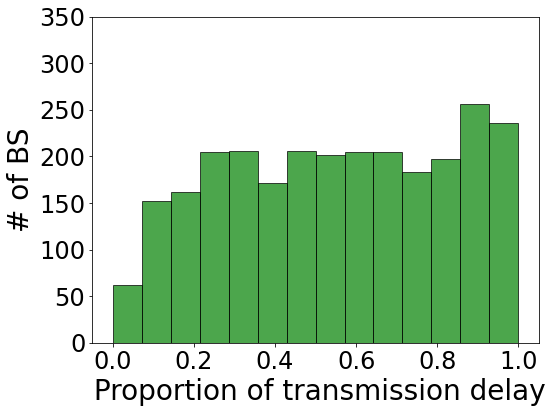

In [142]:
def plot_dist_his_cfs():
    theta = "14.0"
    method = "greedy"
    bs_num = "2769"
    
    data = [(int(i[0])%14)/14 for i in dict[theta][method][bs_num]]
    #print(data[0:50])
    
    fig = plt.figure(figsize=(8, 6))
    
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    
    plt.xlabel(r' Proportion of transmission delay', fontsize=font)
    plt.ylabel(r'# of BS', fontsize=font)
    plt.ylim(0, 350)
    
    plt.hist(data, bins = 14,align='mid',range=[0, 1],facecolor='g', edgecolor='black',alpha=0.7)
    plt.savefig('./img/dist_cfs.pdf', bbox_inches = 'tight')
    plt.show()
    
plot_dist_his_cfs()

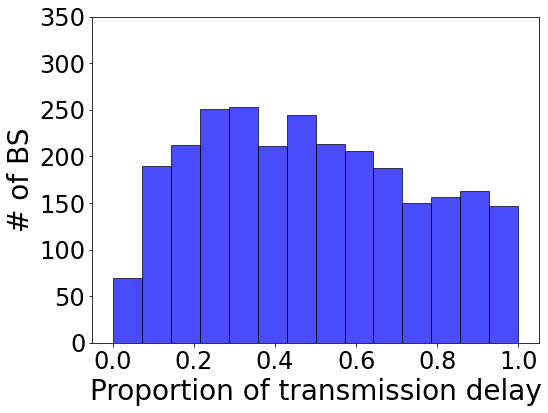

In [143]:
def plot_dist_his_dacfs():
    theta = "14.0"
    method = "greedy_new"
    bs_num = "2769"
    
    data = [(int(i[0])%14)/14 for i in dict[theta][method][bs_num]]
    #print(data[0:50])
    
    fig = plt.figure(figsize=(8, 6))
    
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    
    plt.xlabel(r'Proportion of transmission delay', fontsize=font)
    plt.ylabel(r'# of BS', fontsize=font)
    plt.ylim(0, 350)
    
    plt.hist(data, bins = 14,align='mid',range=[0, 1],facecolor='b', edgecolor='black',alpha=0.7)
    plt.savefig('./img/dist_dacfs.pdf', bbox_inches = 'tight')
    plt.show()
    
plot_dist_his_dacfs()